# Imports


In [55]:
from numpy.random import seed 
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [74]:
import os 
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation

from IPython.display import display
from keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt

%matplotlib inline

# Constant


In [57]:
LABEL_NAMES=['Plane', 'Car','Bird','Cat' ,'Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_PIXELS=IMAGE_HEIGHT*IMAGE_WIDTH
COLOR_CHANNELS=3
TOTAL_INPUTS=COLOR_CHANNELS*IMAGE_PIXELS

VALIDATION_SIZE=10000
SMALL_TRAIN_SIZE = 1000

# Get Data

In [58]:
(x_train_all,y_train_all),(x_test,y_test) = cifar10.load_data()

# Explore Data

In [59]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

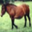

In [60]:
pic = array_to_img(x_train_all[7])
display(pic)

In [61]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

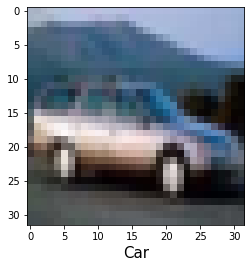

In [62]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

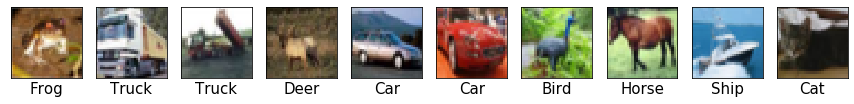

In [63]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=15)
    plt.imshow(x_train_all[i])

In [64]:
x_train_all.shape

(50000, 32, 32, 3)

In [65]:
x_train_all,x_test=x_train_all/255.0,x_test/255.0

In [66]:
x_train_all=x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)

In [67]:
x_test=x_test.reshape(len(x_test),TOTAL_INPUTS)

### Create Validation Dataset

In [68]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [69]:
x_train=x_train_all[VALIDATION_SIZE:]
y_train=x_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset

In [71]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network

In [77]:
model_1 = Sequential([
    Dense(units=128,input_dim=TOTAL_INPUTS,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])